# OLS - 20181014

## To add a heading:
- Insert a new cell
- Type or paste-in content
- Place a single / just one "pound-sign" in front of the heading content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add a sub-heading:
- Insert a new cell
- Type or paste-in content
- Place two "pound-signs" in front of the sub-heading
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add new bulleted documentation:

- Insert a new cell
- Type or paste-in content
- Place a "dash" character in front of the bulleted content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

# References
- Wooldridge, J.M. (2016). Introductory econometrics: A modern approach (6thed.). Mason, OH: South-Western, Cengage Learning.
- Residual Plots: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
- Understanding residual plots: https://data.library.virginia.edu/diagnostic-plots/

# Instantiate libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.formula.api import ols
from statsmodels.compat import lzip

from statsmodels.graphics.gofplots import ProbPlot

#import pandas.tseries.api as sm
#from tseries.formula.apt import ols

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr


plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)


# Data Read from csv

In [2]:
%%time
#df = pd.read_csv(BytesIO(csv_as_bytes),sep='|',nrows=100000)
df1 = pd.read_csv('C://Users//Family//Documents//DataSetEconomics//Wooldridge//CEOSAL1.csv',sep=',')
print(df1.head())

   salary  pcsalary    sales   roe  pcroe  ros  indus  finance  consprod  \
0    1095        20  27595.0  14.1  106.4  191      1        0         0   
1    1001        32   9958.0  10.9  -30.6   13      1        0         0   
2    1122         9   6125.9  23.5  -16.3   14      1        0         0   
3     578        -9  16246.0   5.9  -25.7  -21      1        0         0   
4    1368         7  21783.2  13.8   -3.0   56      1        0         0   

   utility   lsalary     lsales  
0        0  6.998509  10.225390  
1        0  6.908755   9.206132  
2        0  7.022868   8.720281  
3        0  6.359574   9.695602  
4        0  7.221105   9.988894  
Wall time: 354 ms


In [3]:
df1['constant'] = 1

# Data Checks

- Columns

In [4]:
%%time
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 13 columns):
salary      209 non-null int64
pcsalary    209 non-null int64
sales       209 non-null float64
roe         209 non-null float64
pcroe       209 non-null float64
ros         209 non-null int64
indus       209 non-null int64
finance     209 non-null int64
consprod    209 non-null int64
utility     209 non-null int64
lsalary     209 non-null float64
lsales      209 non-null float64
constant    209 non-null int64
dtypes: float64(5), int64(8)
memory usage: 21.3 KB
Wall time: 57 ms


In [5]:
df1.groupby(['indus']).agg({'salary': pd.Series.nunique})

,salary
indus,
0,139
1,64


In [6]:
df1.groupby(['finance']).agg({'salary': pd.Series.nunique})

,salary
finance,
0,155
1,46


In [7]:
df1.groupby(['consprod']).agg({'salary': pd.Series.nunique})

,salary
consprod,
0,141
1,59


In [8]:
df1.groupby(['utility']).agg({'salary': pd.Series.nunique})

,salary
utility,
0,164
1,36


In [9]:
df1.groupby(['utility','consprod','indus','finance']).agg({'salary': pd.Series.nunique})

salary
utility consprod indus finance        
0       0        0     1            46
                 1     0            64
        1        0     0            59
1       0        0     0            36

# Data Explorations

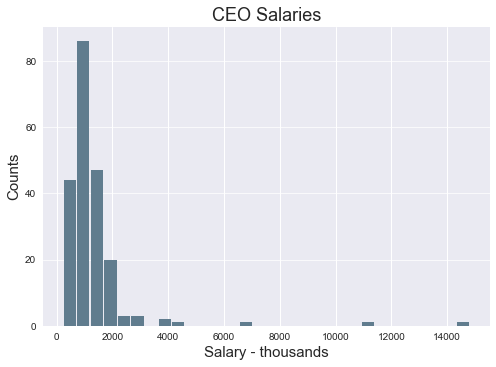

In [13]:
#hist_series = pd.Series(df1.salary)
#hist_series.plot.hist(grid=True, bins=10, rwidth=0.9, color='#607c8e')
df1.salary.plot.hist(grid=True, bins=30, rwidth=0.9, color='#607c8e')
plt.title('CEO Salaries')
plt.xlabel('Salary - thousands')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

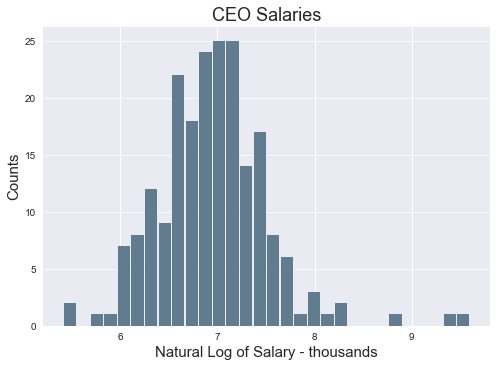

In [14]:
#hist_series = pd.Series(df1.salary)
#hist_series.plot.hist(grid=True, bins=10, rwidth=0.9, color='#607c8e')
df1.lsalary.plot.hist(grid=True, bins=30, rwidth=0.9, color='#607c8e')
plt.title('CEO Salaries')
plt.xlabel('Natural Log of Salary - thousands')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

# OLS: Regress ROE on Salary 

In [15]:
formula = '''salary ~ (roe)
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)
print(results.summary())



                sum_sq     df         F    PR(>F)
roe       5.166419e+06    1.0  2.766532  0.097768
Residual  3.865666e+08  207.0       NaN       NaN
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Tue, 16 Oct 2018   Prob (F-statistic):             0.0978
Time:                        19:06:53   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

# Residual Plotting
- First add some setup variables from the "results" model output.

In [17]:
# fitted values (need a constant term for intercept)
model_fitted_y = results.fittedvalues

# model residuals
model_residuals = results.resid

# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]

# Residual Plot
## non-linear plot line indicative of non-linear relationship not captured in model

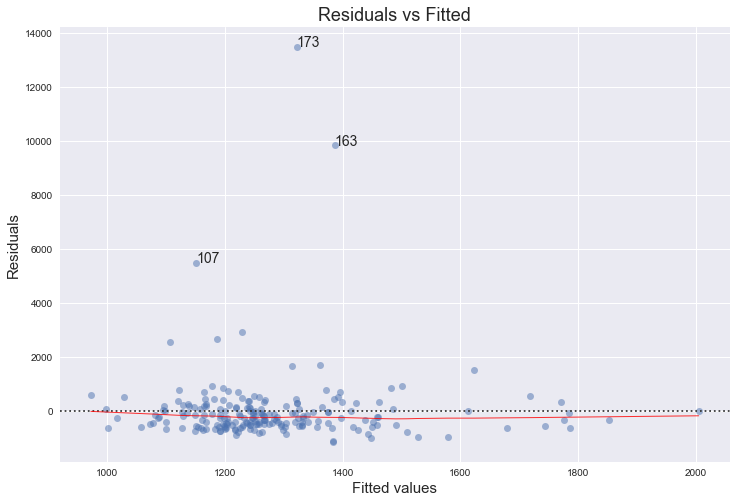

In [19]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'salary', data=df1, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

# QQ Plot
- residuals following plot line well indicative of normally distributed residuals
- residuals that deviate sharply indicative of non-normally distributed residuals

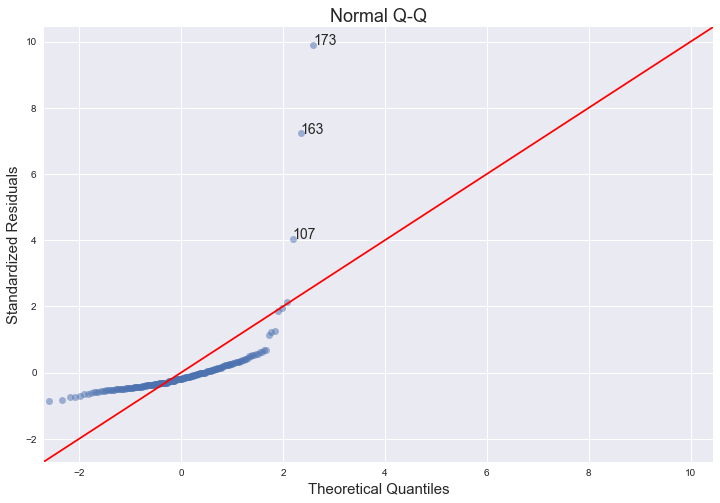

In [20]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

# Scale Location Plot
## indicative of homoscedastic residuals
- Good to see even spread with horizontal line
- Bad to see sloped line with spread following a pattern

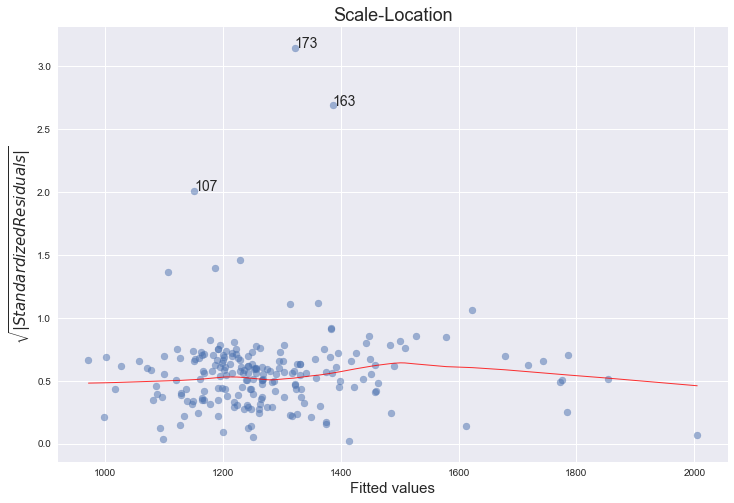

In [21]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

# Leverage Plot
## helps us find influential cases (outliers)

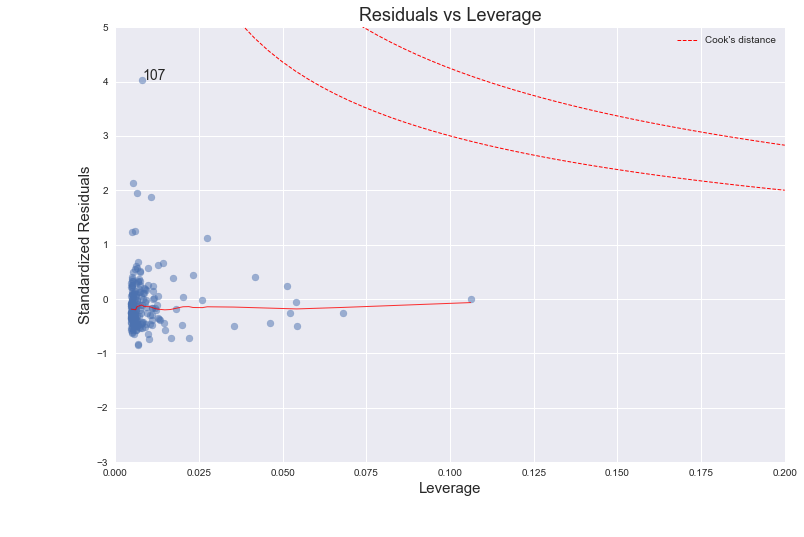

In [23]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(results.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');


In [28]:
print("Heteroscedasticity Test - Breusch Pagan")
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

Heteroscedasticity Test - Breusch Pagan


[('Lagrange multiplier statistic', 0.17204642779924795),
 ('p-value', 0.6782994499450292),
 ('f-value', 0.17054043745216696),
 ('f p-value', 0.6800593888304094)]

In [29]:
print("Heteroscedasticity Test - Goldfeld Quandt")
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)



Heteroscedasticity Test - Goldfeld Quandt


[('F statistic', 9.601010990196002), ('p-value', 5.171423581473016e-26)]

In [30]:
# Multicolinearity
np.linalg.cond(results.model.exog)

43.34128670894513

# Non-Linearities: Functional Form
## Log(Salary) regressed on Log(Sales)

In [31]:
formula = '''lsalary ~ (lsales)
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)
print(results.summary())


             sum_sq     df         F        PR(>F)
lsales    14.066171    1.0  55.29659  2.703389e-12
Residual  52.656002  207.0       NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     55.30
Date:                Sun, 14 Oct 2018   Prob (F-statistic):           2.70e-12
Time:                        19:26:35   Log-Likelihood:                -152.50
No. Observations:                 209   AIC:                             309.0
Df Residuals:                     207   BIC:                             315.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   